In [3]:
import torch
import torch.nn as nn

# 创建交叉熵损失实例
loss_fn = nn.CrossEntropyLoss()

# 随机生成预测值和真实标签
predictions = torch.randn(100, 5)  # 预测值，形状为(样本数, 类别数)
targets = torch.randint(5, (100,))  # 真实标签，形状为(样本数,)

# 计算交叉熵损失
loss = loss_fn(predictions, targets)

# 打印损失值
print('CrossEntropy Loss:', loss.item())
predictions,targets,predictions.size(),targets.size()

CrossEntropy Loss: 1.808915138244629


(tensor([[-6.4989e-01, -5.3087e-01,  2.6790e-01, -5.0741e-01,  1.8606e+00],
         [-7.6823e-01,  1.8396e-01, -7.8864e-01, -4.4553e-01,  1.6429e+00],
         [ 2.8084e-01,  4.9454e-01,  7.9362e-01,  1.1580e+00,  4.5393e-01],
         [-4.3731e-01, -1.6145e-01, -5.5629e-01, -8.1278e-01, -2.3280e-01],
         [-1.7327e+00,  1.8850e+00,  1.8734e-01, -1.7905e+00,  2.6667e-01],
         [-1.9917e+00, -6.6941e-01, -1.4548e+00, -2.2270e-01, -1.8591e+00],
         [-1.5861e-01, -4.3677e-02, -4.2367e-01, -9.0154e-01, -1.4244e-01],
         [-1.1738e-01, -5.3297e-01,  1.6084e+00,  6.6883e-01,  1.1051e+00],
         [-2.1150e+00,  2.7028e-01, -6.3765e-01, -1.7754e+00,  6.2303e-01],
         [-2.2251e+00,  3.8839e-01,  9.9050e-01, -5.8310e-01, -5.7994e-01],
         [-2.3833e-01,  1.0443e+00, -2.3328e-01, -1.7308e+00,  1.7075e-01],
         [ 8.3102e-01,  1.5552e+00, -4.7987e-01,  8.0583e-01,  9.7151e-02],
         [-3.3881e-01, -8.7527e-01,  1.5965e+00,  1.1964e+00,  6.0577e-01],
         [-9

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.models import resnet18

# Define the data transforms for input images
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

# Load the CIFAR-100 dataset
train_dataset = datasets.CIFAR100('/path/to/your/dataset/', train=True, transform=train_transform, download=True)
test_dataset = datasets.CIFAR100('/path/to/your/dataset/', train=False, transform=test_transform, download=True)

# Create data loaders for training and testing data
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False, num_workers=4, pin_memory=True)

# Define the model architecture
model = resnet18(num_classes=100)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Train the model for 100 epochs
for epoch in range(100):
    # Set the model to training mode
    model.train()

    # Loop over the training data and update the model weights
    for i, (images, labels) in enumerate(train_loader):
        # Move the data to the GPU
        images = images.cuda()
        labels = labels.cuda()

        # Zero the gradients and perform forward and backward passes
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Set the model to evaluation mode and compute the test accuracy
    model.eval()
    top1_count = 0
    top5_count = 0
    human_count = 0
    total_count = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.cuda()
            labels = labels.cuda()
            outputs = model(images)

            # Compute top-1 and top-5 accuracy
            _, predicted = torch.max(outputs.data, 1)
            _, top5 = torch.topk(outputs.data, 5)
            top1_count += (predicted == labels).sum().item()
            top5_count += (labels.view(-1,1) == top5).sum().item()

            # Compute the frequency of human categories
            human_categories = [i for i in range(80, 100)]
            human_count += (labels.view(-1,1) == torch.tensor(human_categories).cuda()).sum().item()
            total_count += labels.size(0)

    # Print the epoch number and test accuracy
    top1_acc = top1_count / total_count
    top5_acc = top5_count / total_count
    human_freq = human_count / total_count
    print(f'Epoch {epoch+1}: Top-1 accuracy = {top1_acc:.4f}, Top-5 accuracy = {top5_acc:.4f}, Human category frequency = {human_freq:.4f}')

# Save the trained model to disk
torch.save(model.state_dict(), 'resnet18_cifar100.pth')

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting /path/to/your/dataset/cifar-100-python.tar.gz to /path/to/your/dataset/
Files already downloaded and verified


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os

# Load the pre-trained model
model_path = '/path/to/your/model.pth'
model = torch.load(model_path)
model.eval()

# Define the data transforms for input images
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

# Load the test dataset
test_dir = '/path/to/your/test/images'
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Define the categories to count for top-1 and top-5 accuracy
human_categories = [i for i in range(80, 100)] # 80-99 are human categories

# Initialize counters for top-1 and top-5 accuracy
top1_count = 0
top5_count = 0
total_count = 0

# Loop over the test dataset and perform inference
for i, (image, label) in enumerate(test_dataset):
    # Perform inference on the image
    output = model(image.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)
    _, top5 = torch.topk(output.data, 5)

    # Update the counters for top-1 and top-5 accuracy
    if predicted == label:
        top1_count += 1
    if label in top5:
        top5_count += 1
    if label in human_categories:
        total_count += 1

# Compute and print the accuracy results
top1_acc = top1_count / len(test_dataset)
top5_acc = top5_count / len(test_dataset)
human_freq = total_count / len(test_dataset)
print(f'Top-1 accuracy: {top1_acc:.4f}')
print(f'Top-5 accuracy: {top5_acc:.4f}')
print(f'Human category frequency: {human_freq:.4f}')

In [4]:
import torch
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar100_resnet44", pretrained=True)

Using cache found in C:\Users\lutao/.cache\torch\hub\chenyaofo_pytorch-cifar-models_master
Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/releases/download/resnet/cifar100_resnet44-ffe32858.pt" to C:\Users\lutao/.cache\torch\hub\checkpoints\cifar100_resnet44-ffe32858.pt


  0%|          | 0.00/2.64M [00:00<?, ?B/s]

In [16]:
import numpy as np

total_params = sum(p.numel() for p in model.parameters())
total_size = total_params * 4 / (1024 ** 2)  # 4 bytes per float
print(f'Model size: {total_size:.2f} MB')

Model size: 2.55 MB


In [14]:
for name, param in model.named_parameters():
    print(name, param.shape)

conv1.weight torch.Size([16, 3, 3, 3])
bn1.weight torch.Size([16])
bn1.bias torch.Size([16])
layer1.0.conv1.weight torch.Size([16, 16, 3, 3])
layer1.0.bn1.weight torch.Size([16])
layer1.0.bn1.bias torch.Size([16])
layer1.0.conv2.weight torch.Size([16, 16, 3, 3])
layer1.0.bn2.weight torch.Size([16])
layer1.0.bn2.bias torch.Size([16])
layer1.1.conv1.weight torch.Size([16, 16, 3, 3])
layer1.1.bn1.weight torch.Size([16])
layer1.1.bn1.bias torch.Size([16])
layer1.1.conv2.weight torch.Size([16, 16, 3, 3])
layer1.1.bn2.weight torch.Size([16])
layer1.1.bn2.bias torch.Size([16])
layer1.2.conv1.weight torch.Size([16, 16, 3, 3])
layer1.2.bn1.weight torch.Size([16])
layer1.2.bn1.bias torch.Size([16])
layer1.2.conv2.weight torch.Size([16, 16, 3, 3])
layer1.2.bn2.weight torch.Size([16])
layer1.2.bn2.bias torch.Size([16])
layer1.3.conv1.weight torch.Size([16, 16, 3, 3])
layer1.3.bn1.weight torch.Size([16])
layer1.3.bn1.bias torch.Size([16])
layer1.3.conv2.weight torch.Size([16, 16, 3, 3])
layer1.3.bn

FileNotFoundError: [Errno 2] No such file or directory: 'imagenet_classes.txt'

In [8]:
model.eval()

# Define the data transforms for input images
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

# Load the test dataset
test_dir = 'testing/random_patched'
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Define the categories to count for top-1 and top-5 accuracy
human_categories = [i for i in range(80, 100)] # 80-99 are human categories

# Initialize counters for top-1 and top-5 accuracy
top1_count = 0
top5_count = 0
total_count = 0

# Loop over the test dataset and perform inference
for i, (image, label) in enumerate(test_dataset):
    # Perform inference on the image
    output = model(image.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)
    _, top5 = torch.topk(output.data, 5)

    # Update the counters for top-1 and top-5 accuracy
    if predicted == label:
        top1_count += 1
    if label in top5:
        top5_count += 1
    if label in human_categories:
        total_count += 1

# Compute and print the accuracy results
top1_acc = top1_count / len(test_dataset)
top5_acc = top5_count / len(test_dataset)
human_freq = total_count / len(test_dataset)
print(f'Top-1 accuracy: {top1_acc:.4f}')
print(f'Top-5 accuracy: {top5_acc:.4f}')
print(f'Human category frequency: {human_freq:.4f}')

Top-1 accuracy: 0.0000
Top-5 accuracy: 0.0000
Human category frequency: 0.0000


In [19]:
import os
from PIL import Image
import torchvision.transforms as transforms

# Define the transform to be applied to the input image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define a function to perform inference on a single image
def predict_image(image_path, model):
    # Load the image and apply the transform
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)

    # Pass the image through the model
    output = model(image)

    # Convert the output to probabilities and get the top 5 classes
    probabilities = torch.nn.functional.softmax(output, dim=1)[0]
    top5_prob, top5_classes = torch.topk(probabilities, k=5)

    # Convert the tensor values to a Python list
    top5_prob = top5_prob.tolist()
    top5_classes = top5_classes.tolist()

    # Return a dictionary with the top 5 classes and their probabilities
    return {f'class_{i+1}': {'class': top5_classes[i], 'probability': top5_prob[i]} for i in range(5)}

# Define a function to perform inference on all images in a folder
def predict_folder(folder_path, model):
    # Get a list of all PNG files in the folder
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.png')]

    # Loop over each file and perform inference
    results = {}
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        results[file_name] = predict_image(file_path, model)

    return results

In [21]:
# Define the path to the folder containing the images
folder_path = './testing/random_patched'

# Perform inference on the images in the folder
results = predict_folder(folder_path, model)

# Print the results
print(results)

{'crop001501_rdp.png': {'class_1': {'class': 71, 'probability': 0.978312611579895}, 'class_2': {'class': 60, 'probability': 0.008233410306274891}, 'class_3': {'class': 23, 'probability': 0.00442330539226532}, 'class_4': {'class': 25, 'probability': 0.002474642125889659}, 'class_5': {'class': 33, 'probability': 0.0022044761572033167}}, 'crop001504_rdp.png': {'class_1': {'class': 94, 'probability': 0.415050208568573}, 'class_2': {'class': 71, 'probability': 0.20137669146060944}, 'class_3': {'class': 76, 'probability': 0.13340482115745544}, 'class_4': {'class': 33, 'probability': 0.10777263343334198}, 'class_5': {'class': 68, 'probability': 0.057286594063043594}}, 'crop001511_rdp.png': {'class_1': {'class': 76, 'probability': 0.3449322581291199}, 'class_2': {'class': 23, 'probability': 0.24306271970272064}, 'class_3': {'class': 71, 'probability': 0.09406974166631699}, 'class_4': {'class': 69, 'probability': 0.05955054238438606}, 'class_5': {'class': 87, 'probability': 0.03483547642827034}

In [26]:
# Save the dictionary to a JSON file
import json
save_path = folder_path+'/infer_result.json'
with open(save_path, 'w') as f:
    json.dump(results, f)

In [29]:
# Load the saved dictionary from the JSON file
# with open(save_path) as f:
#     loaded_dict = json.load(f)
# if loaded_dict:
#     print("Success")

{'crop001501_rdp.png': {'class_1': {'class': 71,
   'probability': 0.978312611579895},
  'class_2': {'class': 60, 'probability': 0.008233410306274891},
  'class_3': {'class': 23, 'probability': 0.00442330539226532},
  'class_4': {'class': 25, 'probability': 0.002474642125889659},
  'class_5': {'class': 33, 'probability': 0.0022044761572033167}},
 'crop001504_rdp.png': {'class_1': {'class': 94,
   'probability': 0.415050208568573},
  'class_2': {'class': 71, 'probability': 0.20137669146060944},
  'class_3': {'class': 76, 'probability': 0.13340482115745544},
  'class_4': {'class': 33, 'probability': 0.10777263343334198},
  'class_5': {'class': 68, 'probability': 0.057286594063043594}},
 'crop001511_rdp.png': {'class_1': {'class': 76,
   'probability': 0.3449322581291199},
  'class_2': {'class': 23, 'probability': 0.24306271970272064},
  'class_3': {'class': 71, 'probability': 0.09406974166631699},
  'class_4': {'class': 69, 'probability': 0.05955054238438606},
  'class_5': {'class': 87, 

In [45]:
# 71-75) 婴儿、男孩、女孩、男人、女人
list_result=[]
for pic in results:
    print(pic)
    pic_all= results[pic]
    top_5 =[]
    for aScore in pic_all:
        tmpDic = pic_all[aScore]
        # tmpDic = results[pic]['class_1']
        if tmpDic:
            top_5.append(tmpDic['class'])
        else:
            top_5.append(0)
    list_result.append(top_5)
list_result

crop001501_rdp.png
crop001504_rdp.png
crop001511_rdp.png
crop001512_rdp.png
crop001514_rdp.png
crop001520_rdp.png
crop001521_rdp.png
crop001522_rdp.png
crop001531_rdp.png
crop001533_rdp.png
crop001544_rdp.png
crop001545_rdp.png
crop001546_rdp.png
crop001549_rdp.png
crop001555_rdp.png
crop001566_rdp.png
crop001573_rdp.png
crop001574_rdp.png
crop001590_rdp.png
crop001593_rdp.png
crop001602_rdp.png
crop001604_rdp.png
crop001607_rdp.png
crop001631_rdp.png
crop001633_rdp.png
crop001634_rdp.png
crop001638_rdp.png
crop001639_rdp.png
crop001641_rdp.png
crop001653_rdp.png
crop001654_rdp.png
crop001658_rdp.png
crop001659_rdp.png
crop001660_rdp.png
crop001661_rdp.png
crop001664_rdp.png
crop001670_rdp.png
crop001676_rdp.png
crop001682_rdp.png
crop001683_rdp.png
crop001684_rdp.png
crop001688_rdp.png
crop001704_rdp.png
crop001706_rdp.png
crop001715_rdp.png
crop001716_rdp.png
crop001718_rdp.png
crop001719_rdp.png
crop001722_rdp.png
crop001723_rdp.png
crop001724_rdp.png
crop001725_rdp.png
crop_000001_

[[71, 60, 23, 25, 33],
 [94, 71, 76, 33, 68],
 [76, 23, 71, 69, 87],
 [71, 76, 23, 68, 60],
 [23, 87, 76, 71, 68],
 [71, 23, 87, 25, 16],
 [76, 69, 40, 71, 9],
 [23, 71, 76, 60, 69],
 [71, 76, 23, 33, 68],
 [94, 87, 71, 9, 96],
 [96, 39, 76, 68, 33],
 [60, 23, 71, 25, 99],
 [71, 60, 23, 25, 10],
 [23, 71, 60, 25, 96],
 [71, 23, 25, 76, 69],
 [71, 76, 68, 33, 73],
 [40, 69, 71, 87, 9],
 [71, 40, 69, 23, 76],
 [87, 39, 25, 71, 40],
 [25, 87, 94, 71, 76],
 [76, 68, 71, 69, 9],
 [23, 60, 33, 71, 25],
 [71, 25, 46, 9, 68],
 [71, 23, 60, 25, 68],
 [71, 23, 60, 25, 68],
 [71, 23, 33, 68, 60],
 [76, 87, 94, 40, 9],
 [71, 87, 23, 40, 69],
 [76, 39, 87, 25, 40],
 [71, 60, 23, 68, 87],
 [76, 71, 23, 60, 94],
 [96, 33, 71, 82, 60],
 [96, 71, 33, 60, 23],
 [87, 94, 71, 23, 60],
 [71, 23, 33, 60, 96],
 [94, 96, 33, 71, 40],
 [25, 71, 23, 73, 12],
 [76, 25, 23, 71, 60],
 [71, 87, 39, 76, 40],
 [71, 33, 96, 73, 23],
 [71, 23, 60, 33, 40],
 [39, 76, 87, 40, 25],
 [76, 40, 87, 71, 25],
 [25, 39, 87, 40,

In [41]:
num_pic= len( list_result)
num_pic

288

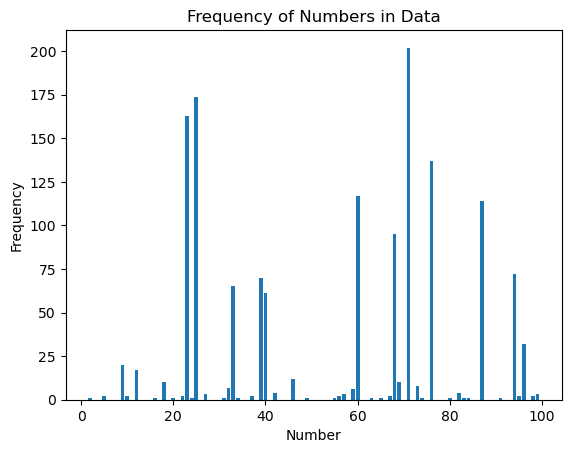

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# 定义数据
data = list_result

# 统计每个数字的频率
freq = {}
for row in data:
    for num in row:
        if num in freq:
            freq[num] += 1
        else:
            freq[num] = 1

# 可视化频率
plt.bar(freq.keys(), freq.values())
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers in Data')
plt.show()

In [44]:
# Define the list
my_list = list_result

# Count the numbers in the range 71-75
count = 0
for num in my_list:
    if num >= 71 and num <= 75:
        count += 1

# Print the result
print(f'The list contains {count} numbers in the range 71-75')

The list contains 67 numbers in the range 71-75


In [48]:
# 将所有数字转化为一个set
all_nums = set(num for row in data for num in row)

# 定义要查找的范围
search_range = range(71, 76)

# 在范围内查找未包含的数字
missing_nums = set(num for num in search_range if num not in all_nums)

# 打印结果
print("Missing numbers:", missing_nums)
print("Number of missing numbers:", len(missing_nums))

Missing numbers: {72, 75}
Number of missing numbers: 2


In [49]:
# 定义要排除的数字
exclude_range = range(71, 76)

# 在数据中查找不包含排除数字的小列表
results = []
for i, row in enumerate(data):
    exclude_found = False
    for num in row:
        if num in exclude_range:
            exclude_found = True
            break
    if not exclude_found:
        results.append((row, i))

# 打印结果
for row, i in results:
    print(f"Row {i}: {row}")

Row 10: [96, 39, 76, 68, 33]
Row 26: [76, 87, 94, 40, 9]
Row 28: [76, 39, 87, 25, 40]
Row 41: [39, 76, 87, 40, 25]
Row 43: [25, 39, 87, 40, 12]
Row 46: [39, 5, 25, 37, 87]
Row 47: [25, 39, 87, 94, 76]
Row 48: [87, 40, 33, 12, 25]
Row 59: [96, 59, 33, 56, 82]
Row 62: [34, 55, 80, 18, 33]
Row 63: [96, 18, 32, 57, 83]
Row 65: [32, 18, 39, 96, 91]
Row 66: [96, 57, 82, 18, 39]
Row 72: [76, 39, 25, 40, 98]
Row 75: [33, 87, 94, 40, 25]
Row 86: [33, 76, 59, 68, 40]
Row 87: [96, 33, 76, 59, 9]
Row 89: [76, 87, 94, 40, 68]
Row 90: [94, 96, 33, 87, 76]
Row 92: [39, 94, 96, 25, 31]
Row 94: [76, 67, 25, 68, 40]
Row 96: [76, 33, 40, 68, 9]
Row 99: [40, 87, 94, 76, 46]
Row 100: [87, 40, 76, 25, 39]
Row 101: [68, 25, 33, 18, 60]
Row 109: [76, 39, 68, 23, 87]
Row 112: [96, 18, 56, 59, 67]
Row 113: [40, 87, 76, 94, 84]
Row 114: [76, 25, 40, 87, 94]
Row 123: [76, 87, 40, 94, 46]
Row 126: [40, 87, 94, 76, 46]
Row 128: [40, 94, 87, 76, 33]
Row 129: [76, 33, 40, 68, 63]
Row 134: [87, 76, 25, 68, 39]
Row 136

In [50]:
len(results)

84